# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars=pd.read_csv('C:/Users/Swift 3/AppData/Local/Programs/Python/Python38/Toyota.csv',index_col=0)

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1436 non-null   object 
 3   FuelType   1336 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 123.4+ KB


In [4]:
cars.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
6,16900,27.0,??,Diesel,????,NaN,0,2000,3,1245
7,18600,30.0,75889,NaN,90,1.0,0,2000,3,1245
8,21500,27.0,19700,Petrol,192,0.0,0,1800,3,1185
9,12950,23.0,71138,Diesel,????,NaN,0,1900,3,1105


In [5]:
cars.isna().sum()

Price          0
Age          100
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [6]:
cars.replace(['??','????'],np.NaN,inplace=True)# ?? and ???? in any column is replaced by NaN.so that it will be counted in isna()

In [7]:
cars.isna().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [8]:
cars.describe()

,Price,Age,MetColor,Automatic,CC,Weight
count,1436.000000,1336.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,0.674961,0.055710,1566.827994,1072.45961
std,3626.964585,18.589804,0.468572,0.229441,187.182436,52.64112
min,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,43.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,60.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,70.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,1.000000,1.000000,2000.000000,1615.00000


In [9]:
# Get the dataframe of rows containing missing values in one or more columns
missing=cars[cars.isnull().any(axis=1)]
missing.shape
print(missing)

      Price   Age     KM FuelType   HP  MetColor  Automatic    CC Doors  \
2     13950  24.0  41711   Diesel   90       NaN          0  2000     3   
6     16900  27.0    NaN   Diesel  NaN       NaN          0  2000     3   
7     18600  30.0  75889      NaN   90       1.0          0  2000     3   
9     12950  23.0  71138   Diesel  NaN       NaN          0  1900     3   
15    22000  28.0  18739   Petrol  NaN       0.0          0  1800     3   
...     ...   ...    ...      ...  ...       ...        ...   ...   ...   
1428   8450  72.0    NaN   Petrol   86       NaN          0  1300     3   
1431   7500   NaN  20544   Petrol   86       1.0          0  1300     3   
1432  10845  72.0    NaN   Petrol   86       0.0          0  1300     3   
1433   8500   NaN  17016   Petrol   86       0.0          0  1300     3   
1434   7250  70.0    NaN      NaN   86       1.0          0  1300     3   

      Weight  
2       1165  
6       1245  
7       1245  
9       1105  
15      1185  
...      

In [10]:
# Fill missing values in column by mean of that column if it contains numerical values
cars['Age'].fillna(cars['Age'].mean(),inplace=True)

In [11]:
cars.isna().sum()

Price          0
Age            0
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [12]:
cars['MetColor'].fillna(cars['MetColor'].mean(),inplace=True)

In [13]:
cars.isna().sum()

Price          0
Age            0
KM            15
FuelType     100
HP             6
MetColor       0
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [14]:
cars['KM'].fillna(cars['KM'].median(),inplace=True)

In [15]:
cars.isna().sum()

Price          0
Age            0
KM             0
FuelType     100
HP             6
MetColor       0
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [16]:
cars['HP'].fillna(cars['HP'].median(),inplace=True)

In [17]:
cars.isna().sum()

Price          0
Age            0
KM             0
FuelType     100
HP             0
MetColor       0
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [18]:
#Returns a Series containing counts of unique values

#The values will be in descending order so that the
#first element is the most frequently occurring
#element

#Excludes NA values by default

In [19]:
cars['FuelType'].value_counts()# counts of unique values
# As you can see, Petrol is occuring maximum no of types.
# Hence mode of 'FuelType' attribute (which is of categorical type), is 'Petrol' 
# whose index is 0 as it is given in descending order

Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [20]:
cars['FuelType'].fillna(cars['FuelType'].value_counts().index[0],inplace=True)

In [21]:
cars.isna().sum()# null values are removed from all features

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [22]:
# filling the missing values at one stretch using lambda function
# If data type of column is float, replace null values by mean of the column
# if data type of column is categorical, replace null values by mode of the column
cars=cars.apply(lambda x: x.fillna(x.mean())if x.dtype=='float' else x.fillna(x.value_counts().index[0]))

In [23]:
cars.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [24]:
cars_copy1=cars.copy()
cars_copy2=cars.copy()
cars_copy3=cars.copy()
cars_copy4=cars.copy()
cars_copy5=cars.copy()

<AxesSubplot:xlabel='FuelType', ylabel='count'>

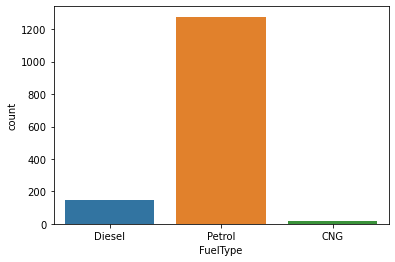

In [25]:
sns.countplot(x='FuelType',data=cars)

In [26]:
pd.crosstab(index=cars['FuelType'],columns='count')# computes a frequency table of a factors

col_0,count
FuelType,
CNG,15
Diesel,144
Petrol,1277


In [27]:
pd.crosstab(index=cars['Automatic'],columns=cars['FuelType'])

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,15,144,1197
1,0,0,80


<AxesSubplot:xlabel='Automatic', ylabel='count'>

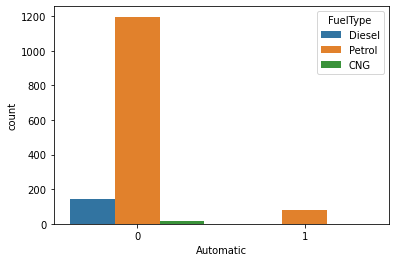

In [28]:
sns.countplot(x='Automatic',hue='FuelType',data=cars)

<AxesSubplot:xlabel='FuelType', ylabel='count'>

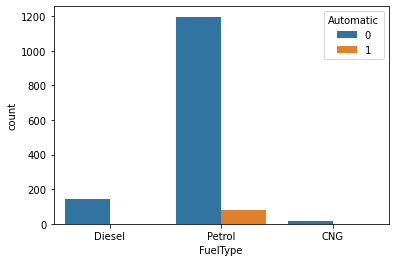

In [29]:
sns.countplot(x='FuelType',hue='Automatic',data=cars)

<AxesSubplot:xlabel='Doors', ylabel='count'>

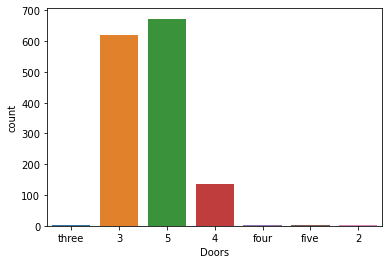

In [30]:
sns.countplot(x='Doors',data=cars)

In [31]:
cars_num=cars.select_dtypes(exclude='object')

In [32]:
cars_num.shape

(1436, 6)

In [33]:
cars_num.corr()# correlation matrix to give correlation between different numeric features

,Price,Age,MetColor,Automatic,CC,Weight
Price,1.000000,-0.845111,0.107943,0.033081,0.165067,0.581198
Age,-0.845111,1.000000,-0.091331,0.030931,-0.116255,-0.442055
MetColor,0.107943,-0.091331,1.000000,-0.013167,0.027524,0.054952
Automatic,0.033081,0.030931,-0.013167,1.000000,-0.069321,0.057249
CC,0.165067,-0.116255,0.027524,-0.069321,1.000000,0.651450
Weight,0.581198,-0.442055,0.054952,0.057249,0.651450,1.000000


## Handling categorical features
### Nominal and ordinal Features

In [34]:
#you might just want to encode a bunch of categories within a feature to some numeric value and 
#encode all the other categories to some other numeric value.
cars['FuelType'] = np.where(cars['FuelType'].str.contains('CNG'), 1, 0)
cars.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,0,90,1.000000,0,2000,three,1165
1,13750,23.0,72937,0,90,1.000000,0,2000,3,1165
2,13950,24.0,41711,0,90,0.674961,0,2000,3,1165
3,14950,26.0,48000,0,90,0.000000,0,2000,3,1165
4,13750,30.0,38500,0,90,0.000000,0,2000,3,1170


In [35]:
# Nominal Features: using one hot encoding
FuelType=pd.get_dummies(cars_copy1['FuelType'])

In [36]:
FuelType

,CNG,Diesel,Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,0,0,1
1432,0,0,1
1433,0,0,1
1434,0,0,1


In [37]:
cars_copy1.drop(['FuelType'],axis=1,inplace=True)

In [38]:
cars_copy1.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,90,1.000000,0,2000,three,1165
1,13750,23.0,72937,90,1.000000,0,2000,3,1165
2,13950,24.0,41711,90,0.674961,0,2000,3,1165
3,14950,26.0,48000,90,0.000000,0,2000,3,1165
4,13750,30.0,38500,90,0.000000,0,2000,3,1170


In [39]:
cars_copy1=pd.concat([cars_copy1,FuelType],axis=1)

In [40]:
cars_copy1.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
0,13500,23.0,46986,90,1.000000,0,2000,three,1165,0,1,0
1,13750,23.0,72937,90,1.000000,0,2000,3,1165,0,1,0
2,13950,24.0,41711,90,0.674961,0,2000,3,1165,0,1,0
3,14950,26.0,48000,90,0.000000,0,2000,3,1165,0,1,0
4,13750,30.0,38500,90,0.000000,0,2000,3,1170,0,1,0


In [41]:
# Label encoding using cat.codes
cars_copy2['FuelType'] = cars_copy2['FuelType'].astype('category')
cars_copy2['FuelType'] = cars_copy2['FuelType'].cat.codes
cars_copy2.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,1,90,1.000000,0,2000,three,1165
1,13750,23.0,72937,1,90,1.000000,0,2000,3,1165
2,13950,24.0,41711,1,90,0.674961,0,2000,3,1165
3,14950,26.0,48000,1,90,0.000000,0,2000,3,1165
4,13750,30.0,38500,1,90,0.000000,0,2000,3,1170


In [42]:
cars_copy2.tail(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1426,9950,78.000000,30964,2,110,0.674961,1,1600,3,1080
1427,8950,55.672156,29000,2,86,1.000000,1,1300,3,1045
1428,8450,72.000000,63634,2,86,0.674961,0,1300,3,1015
1429,8950,78.000000,24000,2,86,1.000000,1,1300,5,1065
1430,8450,80.000000,23000,2,86,0.000000,0,1300,3,1015
1431,7500,55.672156,20544,2,86,1.000000,0,1300,3,1025
1432,10845,72.000000,63634,2,86,0.000000,0,1300,3,1015
1433,8500,55.672156,17016,2,86,0.000000,0,1300,3,1015
1434,7250,70.000000,63634,2,86,1.000000,0,1300,3,1015
1435,6950,76.000000,1,2,110,0.000000,0,1600,5,1114


In [43]:
cars_copy3['FuelType'].head()

0    Diesel
1    Diesel
2    Diesel
3    Diesel
4    Diesel
Name: FuelType, dtype: object

In [44]:
cars_copy3.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [45]:
# Label encoding using sklearn labelencoder
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
cars_copy3['FuelType'] = lb_make.fit_transform(cars_copy3['FuelType'])
cars_copy3.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,1,90,1.000000,0,2000,three,1165
1,13750,23.0,72937,1,90,1.000000,0,2000,3,1165
2,13950,24.0,41711,1,90,0.674961,0,2000,3,1165
3,14950,26.0,48000,1,90,0.000000,0,2000,3,1165
4,13750,30.0,38500,1,90,0.000000,0,2000,3,1170


In [46]:
cars_copy3.tail(7)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1429,8950,78.000000,24000,2,86,1.0,1,1300,5,1065
1430,8450,80.000000,23000,2,86,0.0,0,1300,3,1015
1431,7500,55.672156,20544,2,86,1.0,0,1300,3,1025
1432,10845,72.000000,63634,2,86,0.0,0,1300,3,1015
1433,8500,55.672156,17016,2,86,0.0,0,1300,3,1015
1434,7250,70.000000,63634,2,86,1.0,0,1300,3,1015
1435,6950,76.000000,1,2,110,0.0,0,1600,5,1114


In [47]:
cars_copy3['FuelType'].head(6)

0    1
1    1
2    1
3    1
4    1
5    1
Name: FuelType, dtype: int32

In [48]:
# one hot encoding using labelBinarizer in sklearn
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_results = lb.fit_transform(cars_copy4['FuelType'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
print(lb_results_df.head())
#cars_copy2['lb_results']=lb_results

   CNG  Diesel  Petrol
0    0       1       0
1    0       1       0
2    0       1       0
3    0       1       0
4    0       1       0


In [49]:
cars_copy4.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [50]:
#One hot encoder only takes numerical categorical values, hence any value of string type 
#should be label encoded before one-hot encoded.
from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
enc = OneHotEncoder()
fuel=enc.fit_transform(cars_copy3[['FuelType']]).toarray()
fuel_df=pd.DataFrame(fuel)
#cars_copy3=cars_copy3.join(fuel_df)
cars_copy3=pd.concat([cars_copy3,fuel_df],axis=1)
#cars_copy3['FuelType']=columnTransformer.fit_transform(cars_copy3['FuelType'].to_array())
#pd.concat(cars_copy4,enc_results)
#cars_copy4['enc_results']=enc_results

In [51]:
cars_copy3.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,0,1,2
0,13500,23.0,46986,1,90,1.000000,0,2000,three,1165,0.0,1.0,0.0
1,13750,23.0,72937,1,90,1.000000,0,2000,3,1165,0.0,1.0,0.0
2,13950,24.0,41711,1,90,0.674961,0,2000,3,1165,0.0,1.0,0.0
3,14950,26.0,48000,1,90,0.000000,0,2000,3,1165,0.0,1.0,0.0
4,13750,30.0,38500,1,90,0.000000,0,2000,3,1170,0.0,1.0,0.0
5,12950,32.0,61000,1,90,0.000000,0,2000,3,1170,0.0,1.0,0.0
6,16900,27.0,63634,1,110,0.674961,0,2000,3,1245,0.0,1.0,0.0
7,18600,30.0,75889,2,90,1.000000,0,2000,3,1245,0.0,0.0,1.0
8,21500,27.0,19700,2,192,0.000000,0,1800,3,1185,0.0,0.0,1.0
9,12950,23.0,71138,1,110,0.674961,0,1900,3,1105,0.0,1.0,0.0


In [52]:
cars_copy3.columns

Index([    'Price',       'Age',        'KM',  'FuelType',        'HP',
        'MetColor', 'Automatic',        'CC',     'Doors',    'Weight',
                 0,           1,           2],
      dtype='object')

# Feature Scaling
"""One of the most important transformations you need to apply to your data is feature\
 scaling. With few exceptions, Machine Learning algorithms don’t perform well when\
 the input numerical attributes have very different scales.\
  There are two common ways to get all attributes to have the same scale: min-max scaling and standardization."""

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_cars=pd.DataFrame(scaler.fit_transform(cars_copy3[['Price','KM']]),columns=[['Price','KM']])
print(new_cars.head())

      Price        KM
0  0.763763 -0.582011
1  0.832715  0.116950
2  0.887877 -0.724087
3  1.163685 -0.554700
4  0.832715 -0.810572


In [54]:
print(new_cars.shape)
new_cars.head()

(1436, 2)


,Price,KM
0,0.763763,-0.582011
1,0.832715,0.116950
2,0.887877,-0.724087
3,1.163685,-0.554700
4,0.832715,-0.810572


In [55]:
len(new_cars)

1436

In [56]:
#plt.hist(new_cars,bins=20)

array([[<AxesSubplot:title={'center':"('KM',)"}>,
        <AxesSubplot:title={'center':"('Price',)"}>]], dtype=object)

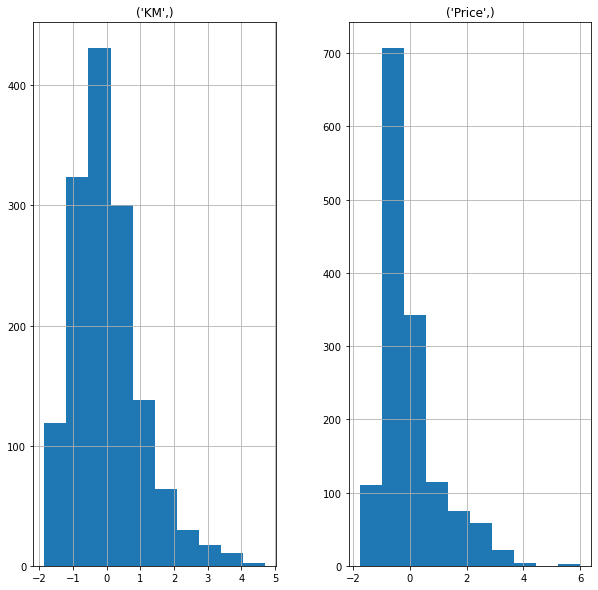

In [57]:
new_cars.hist(figsize=(10,10))

In [58]:
#plt.hist(new_cars[:,0],bins=20)

In [59]:
#plt.hist(new_cars[:,1],bins=20)

In [60]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
new_cars1=pd.DataFrame(min_max.fit_transform(cars_copy3[['Age','KM']]),columns=[['Age','KM']])
print(new_cars1.head())
print(new_cars1.shape)

        Age        KM
0  0.278481  0.193355
1  0.278481  0.300149
2  0.291139  0.171647
3  0.316456  0.197528
4  0.367089  0.158433
(1436, 2)


array([[<AxesSubplot:title={'center':"('Age',)"}>,
        <AxesSubplot:title={'center':"('KM',)"}>]], dtype=object)

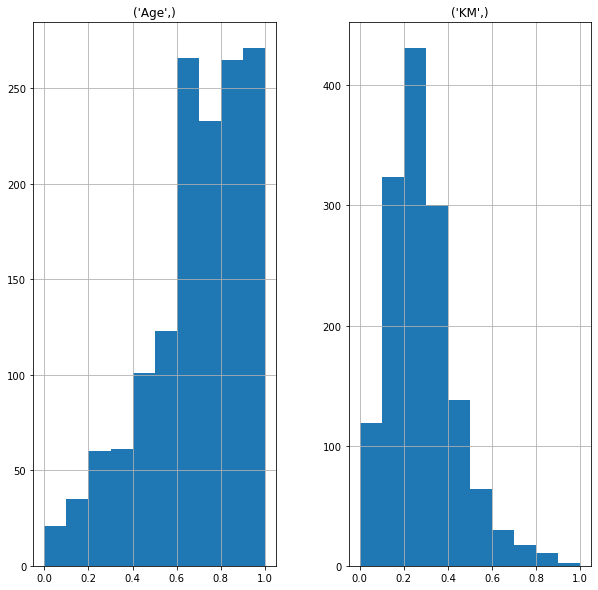

In [61]:
new_cars1.hist(figsize=(10,10))

Feature engineering is an essential part of building an intelligent system. Feature Engineering is an art as well as a science, this is the reason a typical data scientist spends 70 – 80% of his time cleaning and preparing the data which can improve model quality.
Feature engineering is a process of using domain knowledge to create/extract new features from a given dataset by using data mining techniques. It helps machine learning algorithms to understand data and determine patterns that can improve the performance of machine learning algorithms.

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'FuelType'}>],
       [<AxesSubplot:title={'center':'MetColor'}>,
        <AxesSubplot:title={'center':'Automatic'}>,
        <AxesSubplot:title={'center':'CC'}>],
       [<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

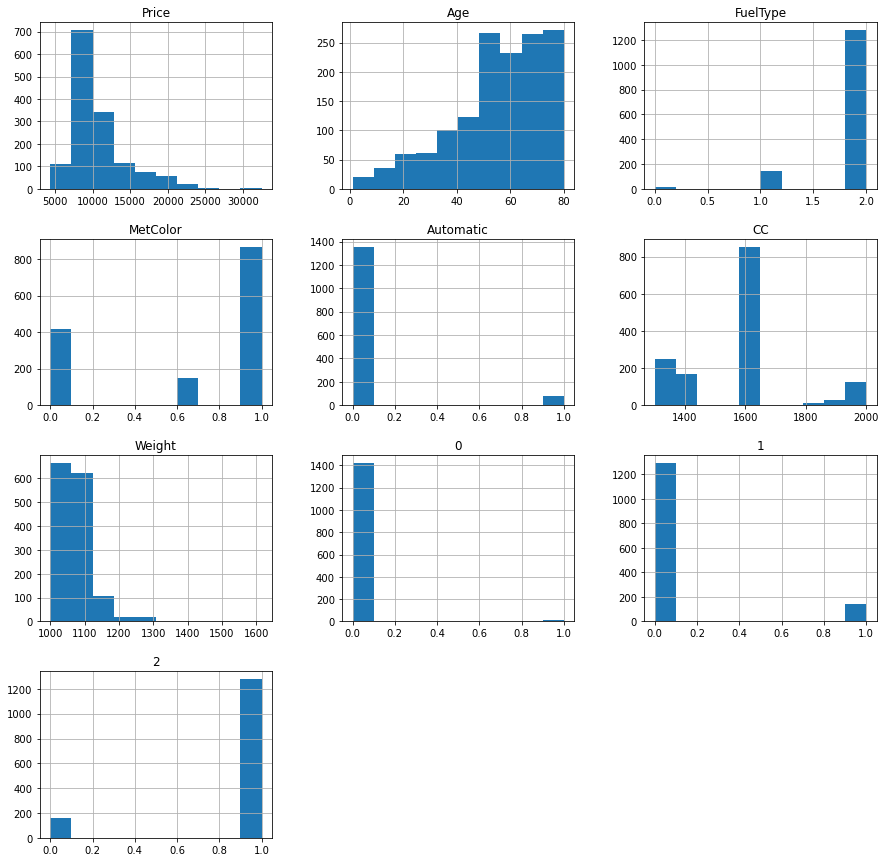

In [62]:
cars_copy3.hist(figsize=(15,15))

((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([ 1.,  1.,  2., ..., 80., 80., 80.])),
 (17.35923652957922, 55.67215568862275, 0.9665257094838958))

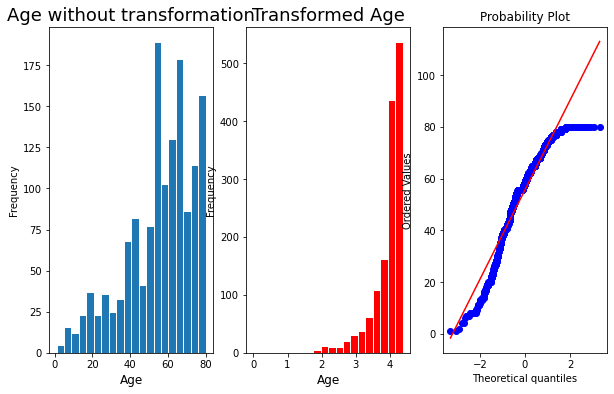

In [63]:
#Log Transformation
import pylab
import scipy.stats as stat

plt.subplot(1,3,1)
(cars_copy3['Age']).plot.hist(bins = 20, figsize = (10,6), edgecolor = 'white')
plt.xlabel('Age', fontsize = 12)
plt.title('Age without transformation', fontsize = 18)

plt.subplot(1,3,2)
np.log(cars_copy3['Age']).plot.hist(bins =20, figsize = (10,6), edgecolor = 'white', color = 'r')
plt.xlabel('Age', fontsize = 12)
plt.title('Transformed Age', fontsize =18)


# qq plot is used to check if an attribute is following normal distribution or not.
# if we get straight line in QQ plot, it means attribute is following normal distribution
plt.subplot(1,3,3)
stat.probplot(cars_copy3['Age'],dist='norm',plot=pylab)


((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([1.        , 1.        , 1.41421356, ..., 8.94427191, 8.94427191,
         8.94427191])),
 (1.3065447261493253, 7.32980136008294, 0.9346632621445536))

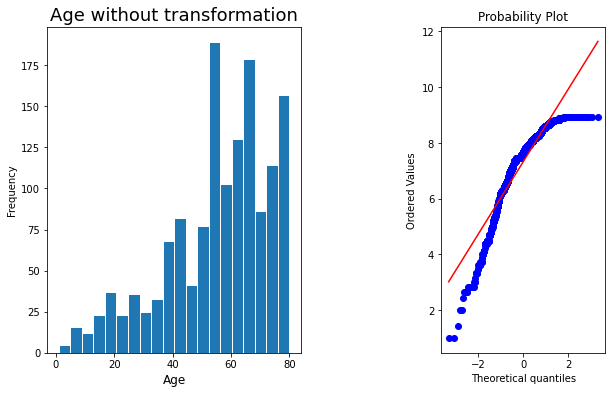

In [64]:
# Square root Transformation
plt.subplot(1,2,1)
(cars_copy3['Age']).plot.hist(bins = 20, figsize = (10,6), edgecolor = 'white')
plt.xlabel('Age', fontsize = 12)
plt.title('Age without transformation', fontsize = 18)

plt.subplot(1,2,2)
cars_copy3['Age']=cars_copy3['Age']**(1/2)
(cars_copy3['Age']).plot.hist(bins =20, figsize = (10,6), edgecolor = 'white', color = 'r')
plt.xlabel('Age', fontsize = 12)
plt.title('Transformed Age', fontsize =18)

plt.subplot(1,3,3)
stat.probplot(cars_copy3['Age'],dist='norm',plot=pylab)

((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([1.        , 1.        , 1.33483985, ..., 6.20803506, 6.20803506,
         6.20803506])),
 (0.7990498403326853, 5.2436352128671375, 0.926585516328147))

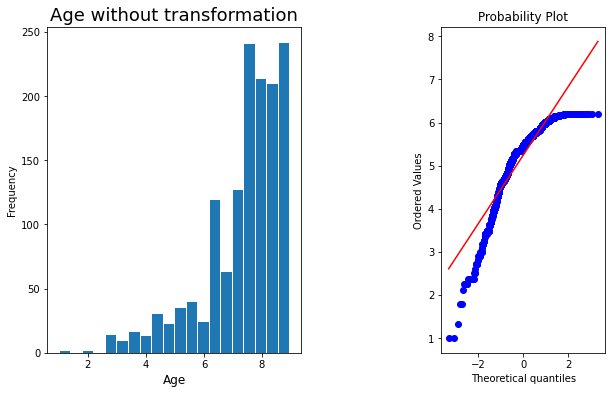

In [65]:
#exponential transformation
plt.subplot(1,2,1)
cars_copy3['Age'].plot.hist(bins=20,figsize = (10,6), edgecolor = 'white')
plt.xlabel('Age', fontsize = 12)
plt.title('Age without transformation', fontsize = 18)

plt.subplot(1,2,2)
cars_copy3['Age']=cars_copy3['Age']**(1/1.2)
(cars_copy3['Age']).plot.hist(bins =20, figsize = (10,6), edgecolor = 'white', color = 'r')
plt.xlabel('Age', fontsize = 12)
plt.title('Transformed Age', fontsize =18)

plt.subplot(1,3,3)
stat.probplot(cars_copy3['Age'],dist='norm',plot=pylab)

<AxesSubplot:ylabel='Frequency'>

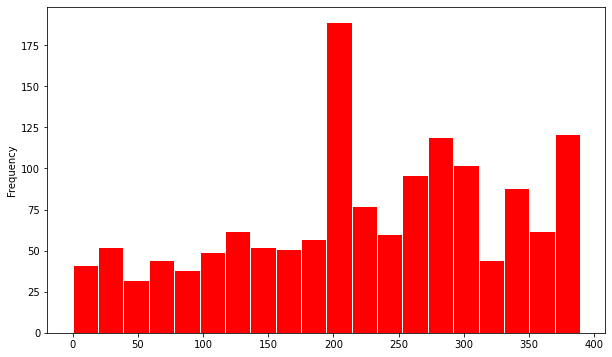

In [66]:
# boxcox transformation
import scipy.stats as stat
cars_copy3['Age'],parameters=stat.boxcox(cars_copy3['Age'])
(cars_copy3['Age']).plot.hist(bins =20, figsize = (10,6), edgecolor = 'white', color = 'r')



((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([  0.        ,   0.        ,   0.54651733, ..., 389.12396036,
         389.12396036, 389.12396036])),
 (102.02839969366063, 224.67099409529916, 0.9828569407669675))

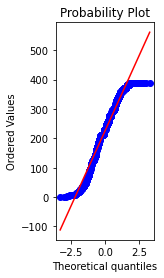

In [67]:
plt.subplot(1,3,3)
stat.probplot(cars_copy3['Age'],dist='norm',plot=pylab)# this transformation gives considerably straight line in QQ plot